In [36]:
import pandas as pd
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import font_manager as fm
path = 'C:\\Users\\Master\\Desktop\\yongju\\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname = path, size = 18)

In [4]:
# 서울특별시 코로나 예방접종 관련 데이터
vaccin_data = pd.read_csv("C:\\Users\\Master\\Desktop\\새 폴더\\서울특별시 코로나19 백신 예방접종 현황.csv", encoding = "cp949")

In [5]:
vaccin_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%)
0,2021.08.15,4802523,3875,4149042,86.4,1162,1849485,38.5
1,2021.08.14,4802523,29755,4145096,86.3,39280,1848314,38.5
2,2021.08.13,4788775,43931,4115097,85.9,121688,1808837,37.8
3,2021.08.12,4737032,28270,4070622,85.9,135399,1686971,35.6
4,2021.08.11,4774960,31041,4041944,84.6,35492,1551492,32.5
...,...,...,...,...,...,...,...,...
112,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
113,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
114,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
115,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6


In [6]:
vaccin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         117 non-null    object 
 1   접종대상자       117 non-null    int64  
 2   당일 1차접종자 수  117 non-null    int64  
 3   1차접종 누계     117 non-null    int64  
 4   1차접종률(%)    117 non-null    float64
 5   당일 2차접종자 수  117 non-null    int64  
 6   2차접종 누계     117 non-null    int64  
 7   2차접종률(%)    117 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 7.4+ KB


In [7]:
#null값 확인
vaccin_data.isnull().sum()

접종일           0
접종대상자         0
당일 1차접종자 수    0
1차접종 누계       0
1차접종률(%)      0
당일 2차접종자 수    0
2차접종 누계       0
2차접종률(%)      0
dtype: int64

#### 접종일 월, 일로 나눔

In [8]:
#접종일을 년도, 월과 일로 분리
vaccin_data['년도'] = vaccin_data['접종일'].str.split(".",expand = True)[0]
vaccin_data['월'] = vaccin_data['접종일'].str.split(".", expand = True)[1]
vaccin_data['일'] = vaccin_data['접종일'].str.split(".", expand = True)[2]

In [9]:
#자료형 변경
vaccin_data['년도'] = vaccin_data['년도'].astype(int)
vaccin_data['월'] = vaccin_data['월'].astype(int)
vaccin_data['일'] = vaccin_data['일'].astype(int)

In [10]:
#결과 확인
vaccin_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),년도,월,일
0,2021.08.15,4802523,3875,4149042,86.4,1162,1849485,38.5,2021,8,15
1,2021.08.14,4802523,29755,4145096,86.3,39280,1848314,38.5,2021,8,14
2,2021.08.13,4788775,43931,4115097,85.9,121688,1808837,37.8,2021,8,13
3,2021.08.12,4737032,28270,4070622,85.9,135399,1686971,35.6,2021,8,12
4,2021.08.11,4774960,31041,4041944,84.6,35492,1551492,32.5,2021,8,11
...,...,...,...,...,...,...,...,...,...,...,...
112,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,2021,4,25
113,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,2021,4,24
114,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,2021,4,23
115,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,2021,4,22


In [11]:
vaccin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         117 non-null    object 
 1   접종대상자       117 non-null    int64  
 2   당일 1차접종자 수  117 non-null    int64  
 3   1차접종 누계     117 non-null    int64  
 4   1차접종률(%)    117 non-null    float64
 5   당일 2차접종자 수  117 non-null    int64  
 6   2차접종 누계     117 non-null    int64  
 7   2차접종률(%)    117 non-null    float64
 8   년도          117 non-null    int32  
 9   월           117 non-null    int32  
 10  일           117 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(1)
memory usage: 8.8+ KB


In [12]:
len(vaccin_data['접종일'].unique())


117

In [13]:
vaccin_data['접종일'].unique()

array(['2021.08.15', '2021.08.14', '2021.08.13', '2021.08.12',
       '2021.08.11', '2021.08.10', '2021.08.09', '2021.08.08',
       '2021.08.07', '2021.08.06', '2021.08.05', '2021.08.04',
       '2021.08.03', '2021.08.02', '2021.08.01', '2021.07.31',
       '2021.07.30', '2021.07.29', '2021.07.28', '2021.07.27',
       '2021.07.26', '2021.07.25', '2021.07.24', '2021.07.23',
       '2021.07.22', '2021.07.21', '2021.07.20', '2021.07.19',
       '2021.07.18', '2021.07.17', '2021.07.16', '2021.07.15',
       '2021.07.14', '2021.07.13', '2021.07.12', '2021.07.11',
       '2021.07.10', '2021.07.09', '2021.07.08', '2021.07.07',
       '2021.07.06', '2021.07.05', '2021.07.04', '2021.07.03',
       '2021.07.02', '2021.07.01', '2021.06.30', '2021.06.29',
       '2021.06.28', '2021.06.27', '2021.06.26', '2021.06.25',
       '2021.06.24', '2021.06.23', '2021.06.22', '2021.06.21',
       '2021.06.20', '2021.06.19', '2021.06.18', '2021.06.17',
       '2021.06.16', '2021.06.15', '2021.06.14', '2021.

In [14]:
vaccin_data.tail(10)

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),년도,월,일
107,2021.04.30,1096899,6655,511162,46.6,691,35900,3.3,2021,4,30
108,2021.04.29,1084245,38789,472376,43.6,4280,31620,2.9,2021,4,29
109,2021.04.28,1088155,33484,438269,40.2,3921,27699,2.5,2021,4,28
110,2021.04.27,1080433,31795,403093,37.3,2062,25631,2.4,2021,4,27
111,2021.04.26,1079832,26585,379120,35.1,3725,21910,2.0,2021,4,26
112,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,2021,4,25
113,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,2021,4,24
114,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,2021,4,23
115,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,2021,4,22
116,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3,2021,4,21


In [15]:
vaccin_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),년도,월,일
0,2021.08.15,4802523,3875,4149042,86.4,1162,1849485,38.5,2021,8,15
1,2021.08.14,4802523,29755,4145096,86.3,39280,1848314,38.5,2021,8,14
2,2021.08.13,4788775,43931,4115097,85.9,121688,1808837,37.8,2021,8,13
3,2021.08.12,4737032,28270,4070622,85.9,135399,1686971,35.6,2021,8,12
4,2021.08.11,4774960,31041,4041944,84.6,35492,1551492,32.5,2021,8,11
...,...,...,...,...,...,...,...,...,...,...,...
112,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,2021,4,25
113,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,2021,4,24
114,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,2021,4,23
115,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,2021,4,22


### 데이터 시각화

#### 1) 접종일별 접종대상자 확인
#### 2) 1차접종, 2차접종 누계 확인
#### 3) 요일별 1차접종자 수, 2차접종사 수 확인

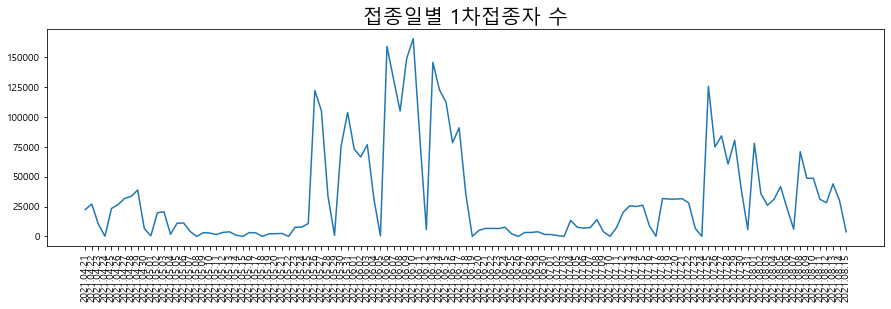

In [16]:
data = vaccin_data.groupby(['접종일'])['당일 1차접종자 수'].sum()
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
plt.title('접종일별 1차접종자 수', fontsize = 20)
plt.plot(data)
plt.show()
#주목해야할 부분
#5월달 급격하게 증가하는 부분(5.26 ~ 5.27)
#6월달 증가했던 접종자 수가 급격하게 감소하는 부분(6.17~6.20)
#7월달 감소했던 접종자 수가 증가하는 부분(7.23 ~ 7.25)

In [17]:
# x = vaccin_data[vaccin_data['월'] == 5]['접종일'].sort_values()
# y = vaccin_data[vaccin_data['월'] == 5]['당일 1차접종자 수'].sort_values()

# plt.figure(figsize = (15,4))
# plt.xticks(rotation = 90)
# plt.title('5월 1차접종자 수', fontsize = 20)
# plt.plot(x,y)
# plt.show()
#5월 1차접종자수를 확인해보니 5.26 ~ 5.27에 접종대상자가 급격하게 늘었음을 확인
#5월 27일 코로나19 예방접종 대규모 접종 시작
#(https://www.news1.kr/articles/?4320627) 5월

In [18]:
# x = vaccin_data[vaccin_data['월'] == 6]['접종일'].sort_values()
# y = vaccin_data[vaccin_data['월'] == 6]['당일 1차접종자 수'].sort_values()

# plt.figure(figsize = (15,4))
# plt.xticks(rotation = 90)
# plt.title('6월 1차접종자 수', fontsize = 20)
# plt.plot(x,y)
# plt.show()

In [19]:
# vaccin_data[vaccin_data['월'] == 6]['당일 1차접종자 수']

In [20]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='접종일'>

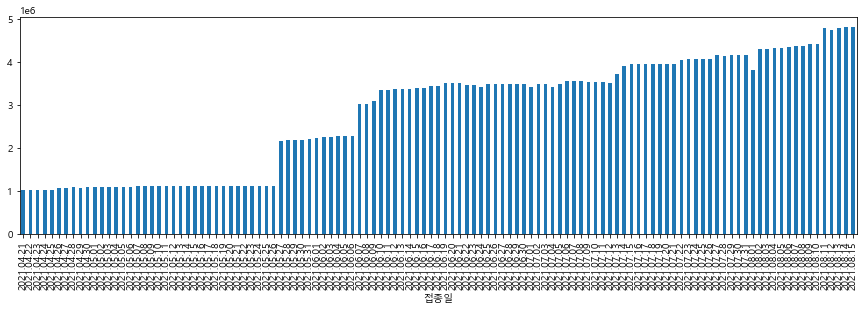

In [21]:
#1) 접종일별 접종대상자 확인
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
vaccin_data.groupby(['접종일'])['접종대상자'].sum().plot(kind = 'bar')


#(https://www.hankyung.com/politics/article/202106070365i) 6월(군인)
#(https://www.news1.kr/articles/?4331562) 6월(노인)

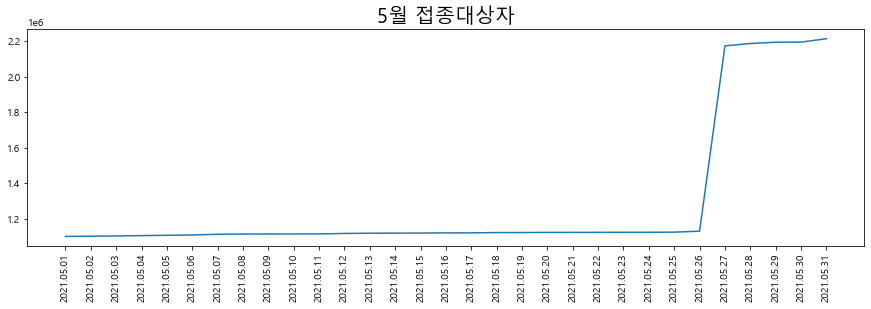

In [22]:
x = vaccin_data[vaccin_data['월'] == 5]['접종일'].sort_values()
y = vaccin_data[vaccin_data['월'] == 5]['접종대상자'].sort_values()

plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
plt.title('5월 접종대상자', fontsize = 20)
plt.plot(x,y)
plt.show()
#5월 접종대상자를 확인해보니 5.26 ~ 5.27에 접종대상자가 급격하게 늘었음을 확인
#5월 27일 코로나19 예방접종 대규모 접종 시작
#(https://www.news1.kr/articles/?4320627) 5월

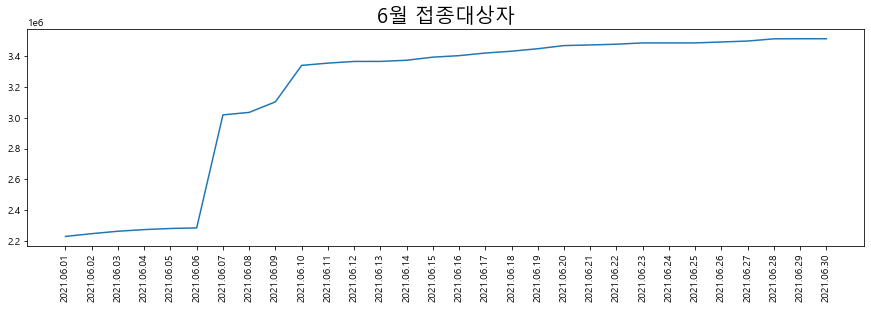

In [23]:
x = vaccin_data[vaccin_data['월'] == 6]['접종일'].sort_values()
y = vaccin_data[vaccin_data['월'] == 6]['접종대상자'].sort_values()

plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
plt.title('6월 접종대상자', fontsize = 20)
plt.plot(x,y)
plt.show()
#6월 접종대상자를 살펴보니 6.6 ~ 6.7에 접종대상자가 급격하게 늘었음을 확인
#6월 7일 노인과 군인을 상대로 대규모 접종이 시작됨
#(https://www.hankyung.com/politics/article/202106070365i) 6월(군인)
#(https://www.news1.kr/articles/?4331562) 6월(노인)

<AxesSubplot:title={'center':'1차접종 누계'}, xlabel='접종일'>

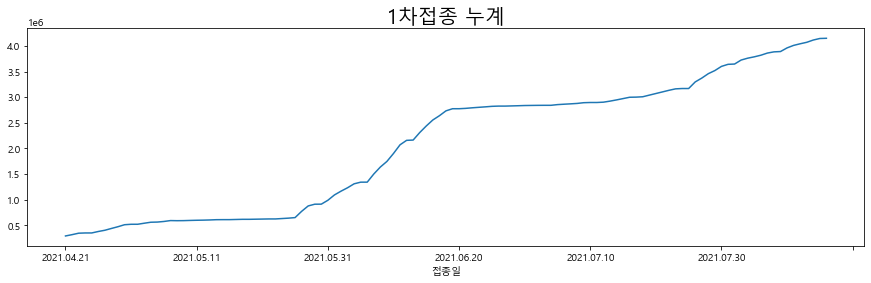

In [24]:
#1차접종 추이 분석
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
plt.title('1차접종 누계', fontsize = 20)
vaccin1 = vaccin_data.groupby(['접종일'])['1차접종 누계'].sum()
vaccin1.plot()

<AxesSubplot:title={'center':'2차접종 누계'}, xlabel='접종일'>

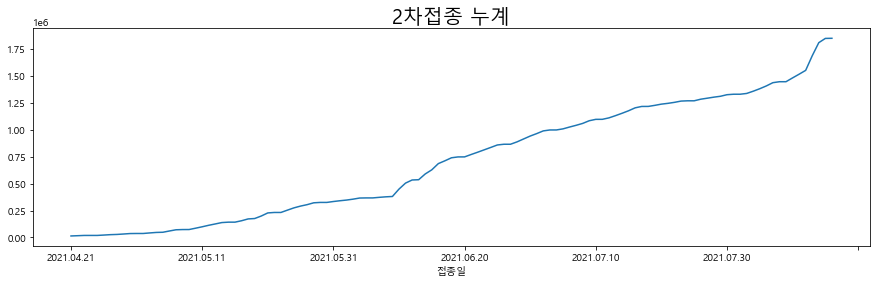

In [25]:
#2차 접종 추이 분석
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
plt.title('2차접종 누계', fontsize = 20)
vaccin2 = vaccin_data.groupby(['접종일'])['2차접종 누계'].sum()
vaccin2.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

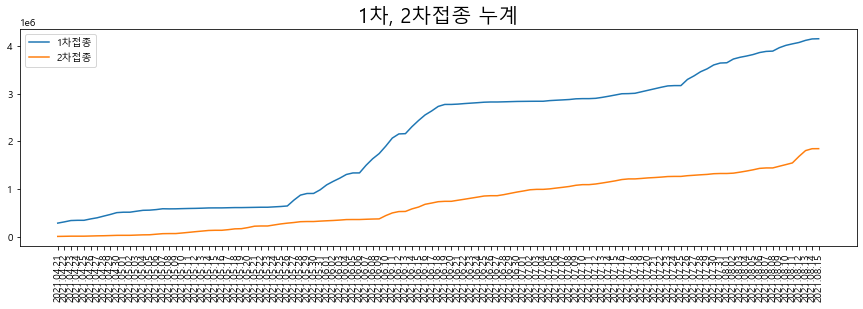

In [26]:
#1차, 2차접종 누계 한 그래프로 그려서 추이 확인하기
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
plt.plot(vaccin1)
plt.plot(vaccin2)
plt.legend(['1차접종','2차접종'])
plt.title('1차, 2차접종 누계', fontsize = 20)
plt.show

In [27]:
import datetime
t = ['월','화','수','목','금','토','일']

In [28]:
#요일 컬럼 생성
day_list = []
for i in range(0, len(vaccin_data)) :
    s = datetime.datetime(vaccin_data['년도'][i],vaccin_data['월'][i],vaccin_data['일'][i]).weekday()
    day_list.append(t[s])
sr1 = pd.Series(day_list, name='요일')
vaccin_data = pd.concat([vaccin_data, sr1], axis = 1)

vaccin_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),년도,월,일,요일
0,2021.08.15,4802523,3875,4149042,86.4,1162,1849485,38.5,2021,8,15,일
1,2021.08.14,4802523,29755,4145096,86.3,39280,1848314,38.5,2021,8,14,토
2,2021.08.13,4788775,43931,4115097,85.9,121688,1808837,37.8,2021,8,13,금
3,2021.08.12,4737032,28270,4070622,85.9,135399,1686971,35.6,2021,8,12,목
4,2021.08.11,4774960,31041,4041944,84.6,35492,1551492,32.5,2021,8,11,수
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,2021,4,25,일
113,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,2021,4,24,토
114,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,2021,4,23,금
115,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,2021,4,22,목


In [29]:
vaccin_data

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),년도,월,일,요일
0,2021.08.15,4802523,3875,4149042,86.4,1162,1849485,38.5,2021,8,15,일
1,2021.08.14,4802523,29755,4145096,86.3,39280,1848314,38.5,2021,8,14,토
2,2021.08.13,4788775,43931,4115097,85.9,121688,1808837,37.8,2021,8,13,금
3,2021.08.12,4737032,28270,4070622,85.9,135399,1686971,35.6,2021,8,12,목
4,2021.08.11,4774960,31041,4041944,84.6,35492,1551492,32.5,2021,8,11,수
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,2021,4,25,일
113,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,2021,4,24,토
114,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,2021,4,23,금
115,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,2021,4,22,목


In [45]:
#요일별 1차접종자 수 확인
vaccin_sum_by_day = vaccin_data.groupby('요일')['당일 1차접종자 수'].sum().to_frame().sort_values(by = '당일 1차접종자 수')
vaccin_sum_by_day

,당일 1차접종자 수
요일,
토,49675
금,338372
화,569171
월,646487
수,682926
목,748713
일,775750


<AxesSubplot:xlabel='요일', ylabel='당일 1차접종자 수'>

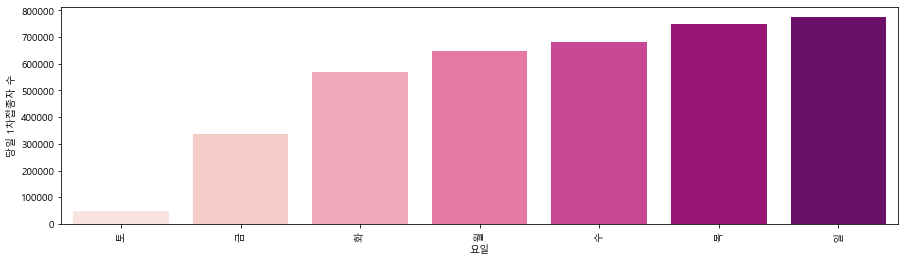

In [46]:
#요일별 1차접종자 수 그래프로 확인
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
sns.barplot(data = vaccin_sum_by_day , x = vaccin_sum_by_day.index, y = '당일 1차접종자 수', palette="RdPu")

In [53]:
vaccin_data[vaccin_data['요일'] == '토']
#실제로 토요일 1차접종자 수가 다른 요일에 비하여 많이 없음을 확인

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),년도,월,일,요일
1,2021.08.14,4802523,29755,4145096,86.3,39280,1848314,38.5,2021,8,14,토
8,2021.08.07,4356536,6105,3884200,89.2,106,1446093,33.2,2021,8,7,토
15,2021.07.31,4170013,5674,3640808,87.3,68,1329899,31.9,2021,7,31,토
22,2021.07.24,4065545,85,3168820,77.9,19,1268896,31.2,2021,7,24,토
29,2021.07.17,3955276,118,3000991,76.1,151,1216426,30.8,2021,7,17,토
36,2021.07.10,3537117,66,2896137,81.9,222,1096559,31.0,2021,7,10,토
43,2021.07.03,3476510,0,2841238,81.7,0,997938,28.7,2021,7,3,토
50,2021.06.26,3484201,0,2825885,81.0,0,865395,24.8,2021,6,26,토
57,2021.06.19,3511144,66,2774543,79.0,65,747652,21.3,2021,6,19,토
64,2021.06.12,3364288,5702,2157602,64.1,2522,533379,15.9,2021,6,12,토


In [54]:
#요일별 2차접종자 수 
vaccin_sum_by_day2 = vaccin_data.groupby('요일')['당일 2차접종자 수'].sum().to_frame().sort_values(by = '당일 2차접종자 수')
vaccin_sum_by_day2

,당일 2차접종자 수
요일,
토,42433
금,216255
화,250252
월,254126
일,255535
수,320812
목,450606


<AxesSubplot:xlabel='요일', ylabel='당일 2차접종자 수'>

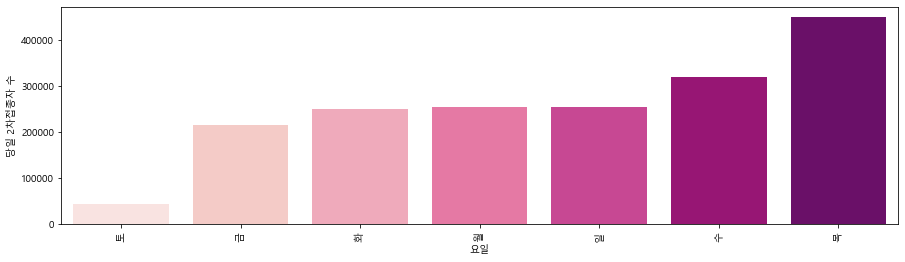

In [55]:
#요일별 2차접종자 수 그래프로 확인
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
sns.barplot(data = vaccin_sum_by_day2 , x = vaccin_sum_by_day2.index, y = '당일 2차접종자 수', palette="RdPu")